## No.1.

Nama : Sri Meiylani Rejeki <br>
NIM : I.2111729

## No.2

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np

## No.3

In [2]:
(x_train, x_label), (y_test, y_label) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 5s 0us/step


## No.4

In [3]:
#nama superkelas
indeks_large_carnivores = {
    "bear": 3,
    "leopard": 42,
    "lion": 43,
    "tiger": 88,
    "wolf": 97
}

## No.5

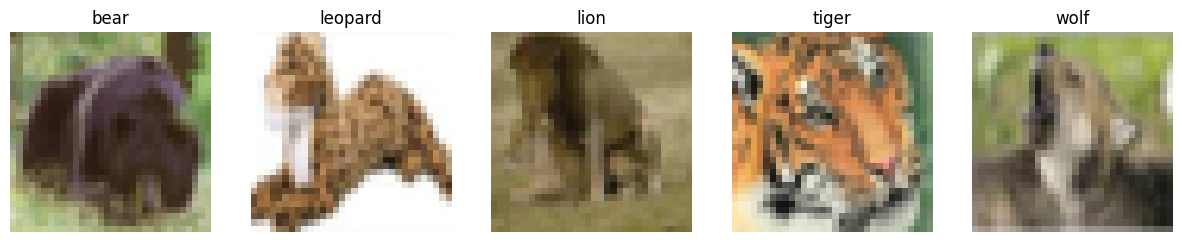

In [4]:
plt.figure(figsize=(15,3))
for i, (nama_kelas, nama_indeks) in enumerate (indeks_large_carnivores.items()):
    indeks = np.where(x_label.flatten() == nama_indeks)[0][0]
    plt.subplot(1, len(indeks_large_carnivores), i+1)
    plt.imshow(x_train[indeks])
    plt.title(nama_kelas)
    plt.axis("off")
plt.show()

## No.6

In [5]:
indeks2_large_carnivores = [3, 42, 43,88, 97]

x_train_baru = []
x_label_baru = []

for i in indeks2_large_carnivores:
    indeks = np.where(x_label == i)[0]
    x_train_baru.append(x_train[indeks])
    x_label_baru.append(x_label[indeks])

x_train_baru = np.concatenate(x_train_baru) #tujuannya untuk menggabungkan dua atau lebih array
x_label_baru = np.concatenate(x_label_baru)

In [6]:
x_train_baru.shape

(2500, 32, 32, 3)

In [7]:
x_label_baru.shape

(2500, 1)

## No. 7

In [8]:
x_train_normalized = x_train / 255.0
y_test_normalized = y_test / 255.0

## No.8

In [9]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

## No.9

In [10]:
model_rcnn = tf.keras.Sequential([
    tf.keras.layers.Reshape((32, 32, 3), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

## No.10

Convolutional Neural Networks (CNN) dan Recurrent Convolutional Neural Networks (RCNN) adalah dua arsitektur yang umum digunakan dalam tugas pengolahan citra. Pada CNN, lapisan konvolusi adalah komponen kunci yang memproses citra dengan mengaplikasikan filter atau kernel untuk mengekstrak fitur-fitur lokal. Selain itu, lapisan pooling digunakan untuk mengurangi dimensi spasial dan mempertahankan fitur utama. <br>
RCNN, yang menggabungkan konsep dari CNN dan lapisan rekurensi, mengenali pola temporal dalam data citra. Lapisan konvolusi tetap berperan dalam mengekstrak fitur-fitur spasial, namun lapisan rekurensi memungkinkan model memahami hubungan temporal dan kontekstual antara fitur-fitur tersebut. RCNN sering digunakan dalam tugas-tugas yang melibatkan urutan data citra, seperti deteksi objek dalam video, di mana hubungan temporal antara frame sangat penting untuk pengenalan objek yang akurat.

## No.11

In [11]:
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_cnn.fit(x_train_normalized, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 34s 169ms/step - loss: 4.4682 - accuracy: 0.0254
Epoch 2/10
196/196 [==============================] - 40s 203ms/step - loss: 4.0598 - accuracy: 0.0776
Epoch 3/10
196/196 [==============================] - 46s 238ms/step - loss: 3.8953 - accuracy: 0.1034
Epoch 4/10
196/196 [==============================] - 38s 195ms/step - loss: 3.8255 - accuracy: 0.1144
Epoch 5/10
196/196 [==============================] - 32s 163ms/step - loss: 3.7829 - accuracy: 0.1222
Epoch 6/10
196/196 [==============================] - 37s 187ms/step - loss: 3.7624 - accuracy: 0.1267
Epoch 7/10
196/196 [==============================] - 31s 157ms/step - loss: 3.7451 - accuracy: 0.1286
Epoch 8/10
196/196 [==============================] - 31s 157ms/step - loss: 3.7258 - accuracy: 0.1330
Epoch 9/10
196/196 [==============================] - 32s 162ms/step - loss: 3.6959 - accuracy: 0.1365
Epoch 10/10
196/196 [==============================] - 32s 161ms/step - l

## No.12

In [12]:
model_rcnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

model_rcnn.fit(x_train_normalized, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 32s 159ms/step - loss: 3.9884 - accuracy: 0.1083
Epoch 2/10
196/196 [==============================] - 35s 179ms/step - loss: 3.3081 - accuracy: 0.2117
Epoch 3/10
196/196 [==============================] - 45s 227ms/step - loss: 3.1153 - accuracy: 0.2450
Epoch 4/10
196/196 [==============================] - 35s 179ms/step - loss: 2.9980 - accuracy: 0.2681
Epoch 5/10
196/196 [==============================] - 32s 165ms/step - loss: 2.8880 - accuracy: 0.2838
Epoch 6/10
196/196 [==============================] - 31s 160ms/step - loss: 2.8193 - accuracy: 0.2978
Epoch 7/10
196/196 [==============================] - 32s 163ms/step - loss: 2.7352 - accuracy: 0.3143
Epoch 8/10
196/196 [==============================] - 35s 180ms/step - loss: 2.6482 - accuracy: 0.3329
Epoch 9/10
196/196 [==============================] - 31s 161ms/step - loss: 2.5704 - accuracy: 0.3454
Epoch 10/10
196/196 [==============================] - 32s 162ms/step - l

## No.13

In [13]:
model_cnn.save('Model_CNN.h5')
model_rcnn.save('Model_RCNN.h5')
loaded_model_cnn = tf.keras.models.load_model('Model_CNN.h5')
loaded_model_rcnn = tf.keras.models.load_model('Model_RCNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## No.14

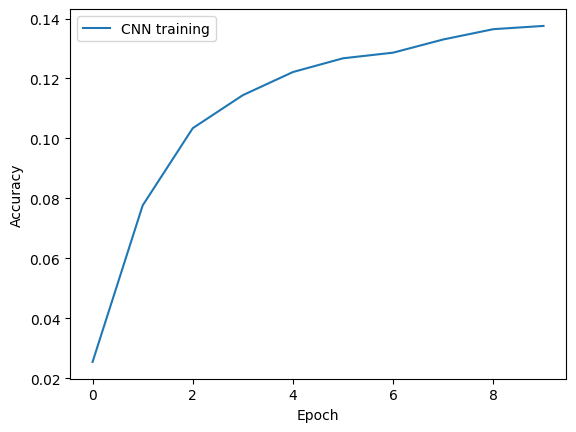

In [14]:
plt.plot(model_cnn.history.history['accuracy'], label='CNN training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## No.15

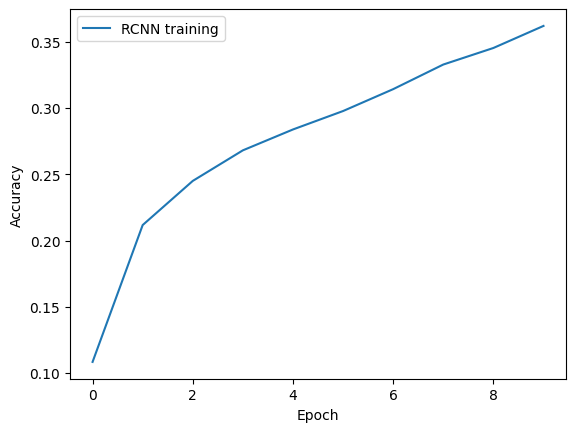

In [15]:
plt.plot(model_rcnn.history.history['accuracy'], label='RCNN training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## No.16

Kesimpulan dari kedua model tersebut adalah model yang memiliki hasil akhir yang bagus terdapat pada model pertama